<a href="https://colab.research.google.com/github/KarmanyaGupta1421/Facial-Expression-Recognition/blob/main/facial_expression_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install kaggle

In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download -d msambare/fer2013

 99% 60.0M/60.3M [00:03<00:00, 20.6MB/s]
100% 60.3M/60.3M [00:03<00:00, 15.9MB/s]


In [6]:
! mkdir /content/face_data

In [7]:
! unzip fer2013.zip -d /content/face_data

Streaming output truncated to the last 5000 lines.
  inflating: /content/face_data/train/sad/Training_65242339.jpg  
  inflating: /content/face_data/train/sad/Training_65267116.jpg  
  inflating: /content/face_data/train/sad/Training_65275626.jpg  
  inflating: /content/face_data/train/sad/Training_6529266.jpg  
  inflating: /content/face_data/train/sad/Training_65329617.jpg  
  inflating: /content/face_data/train/sad/Training_65338712.jpg  
  inflating: /content/face_data/train/sad/Training_65338797.jpg  
  inflating: /content/face_data/train/sad/Training_65387162.jpg  
  inflating: /content/face_data/train/sad/Training_65404494.jpg  
  inflating: /content/face_data/train/sad/Training_65426218.jpg  
  inflating: /content/face_data/train/sad/Training_65430136.jpg  
  inflating: /content/face_data/train/sad/Training_65437377.jpg  
  inflating: /content/face_data/train/sad/Training_6545735.jpg  
  inflating: /content/face_data/train/sad/Training_65463385.jpg  
  inflating: /content/face_

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

Number of images in angry folder: 3995
Number of images in happy folder: 7215
Number of images in disgust folder: 436
Number of images in neutral folder: 4965
Number of images in surprise folder: 3171
Number of images in sad folder: 4830
Number of images in fear folder: 4097


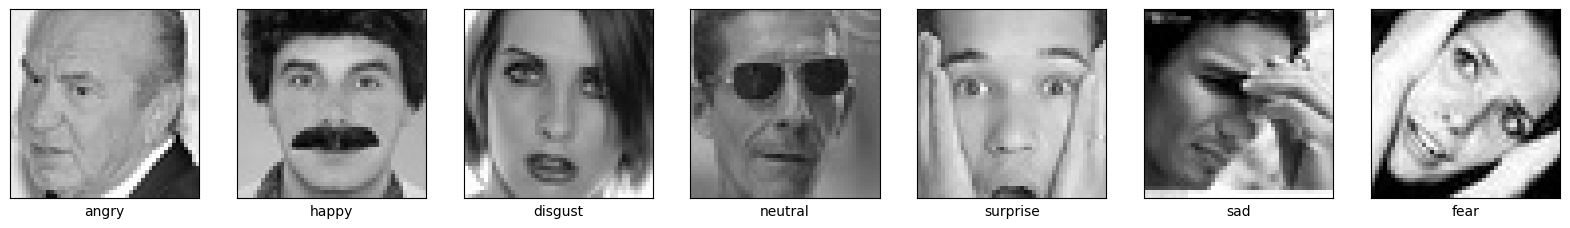

In [15]:
from tensorflow.keras.utils import load_img

base_dir = "./face_data/"
train_dir = os.path.join(base_dir, "train/")
test_dir = os.path.join(base_dir, "test/")

plt.figure(figsize = (20,5))
x = 1

#iterating over every expressin
for expressions in os.listdir(train_dir):
  expression = os.path.join(train_dir, expressions)
  expression_dir = os.listdir(expression)
  print(f"Number of images in {expressions} folder: {len(expression_dir)}")

  ax = plt.subplot(1,7,x)
  plt.imshow(load_img(f"{os.path.join(expression, np.random.choice(expression_dir))}"))
  x+=1
  plt.xlabel(expressions) # writing label for each expression

  #turning x ans y tick marks off
  ax.set_xticks([])
  ax.set_yticks([])

plt.subplots_adjust(hspace = 0.3)

plt.show()



In [16]:
from tensorflow.keras.utils import img_to_array

random_dir = os.path.join(train_dir, np.random.choice(os.listdir(train_dir)))
sample_img = load_img(f"{os.path.join(random_dir, np.random.choice(os.listdir(random_dir)))}")

sample_array = img_to_array(sample_img)

print("Shape of random image:", sample_array.shape)
# print(np.max(sample_array))

Shape of random image: (48, 48, 3)


In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def train_image_generator(sub_dir):

  datagen = ImageDataGenerator(rescale = 1./255,
                               width_shift_range = 0.1,
                               height_shift_range = 0.1,
                               horizontal_flip = True,)

  dir = os.path.join("./face_data/", sub_dir)

  data = datagen.flow_from_directory(dir,
                                     target_size = (48,48),
                                     color_mode='grayscale',
                                     class_mode = "categorical",
                                     shuffle = "True",
                                     )

  return data

def test_image_generator(sub_dir):

  datagen = ImageDataGenerator(rescale = 1./255)

  dir = os.path.join("./face_data/", sub_dir)

  data = datagen.flow_from_directory(dir,
                                     target_size = (48,48),
                                     color_mode='grayscale',
                                     class_mode = "categorical",
                                     shuffle = "True",
                                     )

  return data

In [18]:
train_data = train_image_generator("train/")
test_data = test_image_generator("test/")

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [19]:
#Defining the model

model = tf.keras.models.Sequential([
          #Convolutional and Maxpooling layers
          tf.keras.layers.Conv2D(32, (3,3), activation = tf.nn.relu, input_shape = (48,48,1)),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Conv2D(64, (3,3), activation = tf.nn.relu),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.MaxPooling2D(2,2),
          tf.keras.layers.Dropout(0.25),

          tf.keras.layers.Conv2D(128, (3,3), activation = tf.nn.relu),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Conv2D(128, (3,3), activation = tf.nn.relu),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.MaxPooling2D(2,2),
          tf.keras.layers.Dropout(0.25),

          tf.keras.layers.Conv2D(256, (3,3), activation = tf.nn.relu),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.MaxPooling2D(2,2),
          tf.keras.layers.Dropout(0.25),

          #Dense layers
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(512, activation = tf.nn.relu),
          tf.keras.layers.Dropout(0.3),
          tf.keras.layers.Dense(128, activation = tf.nn.relu),
          tf.keras.layers.Dropout(0.1),
          tf.keras.layers.Dense(7, activation = tf.nn.softmax)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 46, 46, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 44, 44, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 22, 22, 64)        0         
 D)                                                              
                                                        

In [20]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [21]:
history = model.fit(x = train_data,
                    validation_data = test_data,
                    epochs = 50)

Epoch 1/50
898/898 [==============================] - 41s 36ms/step - loss: 1.8018 - accuracy: 0.2752 - val_loss: 1.8656 - val_accuracy: 0.3045
Epoch 2/50
898/898 [==============================] - 30s 33ms/step - loss: 1.5676 - accuracy: 0.3761 - val_loss: 1.5247 - val_accuracy: 0.4315
Epoch 3/50
898/898 [==============================] - 30s 33ms/step - loss: 1.4453 - accuracy: 0.4381 - val_loss: 1.5299 - val_accuracy: 0.4237
Epoch 4/50
898/898 [==============================] - 31s 34ms/step - loss: 1.3686 - accuracy: 0.4745 - val_loss: 1.3512 - val_accuracy: 0.4900
Epoch 5/50
898/898 [==============================] - 31s 35ms/step - loss: 1.3205 - accuracy: 0.4966 - val_loss: 1.2048 - val_accuracy: 0.5410
Epoch 6/50
898/898 [==============================] - 30s 33ms/step - loss: 1.2753 - accuracy: 0.5178 - val_loss: 1.1557 - val_accuracy: 0.5542
Epoch 7/50
898/898 [==============================] - 30s 33ms/step - loss: 1.2510 - accuracy: 0.5284 - val_loss: 1.1485 - val_accuracy:

In [22]:
model.evaluate(test_data)

225/225 [==============================] - 3s 15ms/step - loss: 0.9902 - accuracy: 0.6308


[0.9902368783950806, 0.6308164000511169]

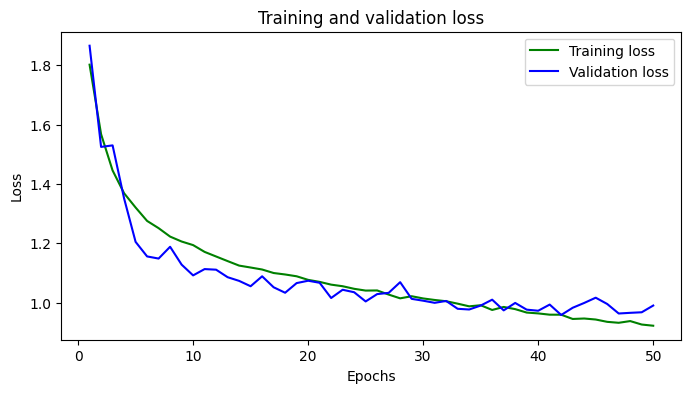

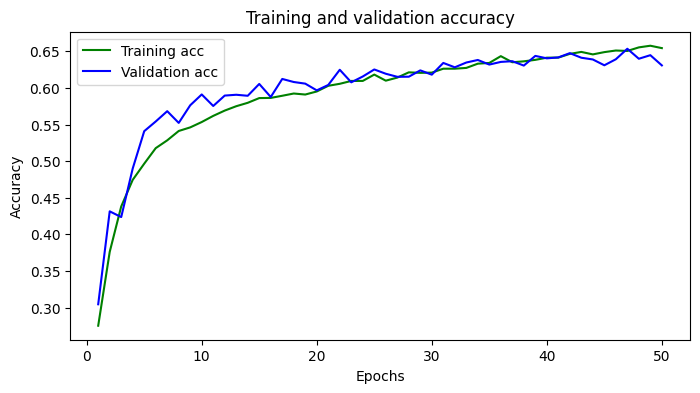

In [23]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure(figsize=(8,4))
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print()

acc = history.history['accuracy']
epochs = np.arange(1, len(acc) + 1)
val_acc = history.history['val_accuracy']
plt.figure(figsize=(8,4))
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [24]:
# print(test_data.class_indices)
class_names = dict((v, k) for k, v in test_data.class_indices.items())
print(class_names)

{0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}


Saving ang.jpeg to ang.jpeg
Saving download.jpeg to download.jpeg
Saving h2.jpeg to h2.jpeg
Saving h3.jpeg to h3.jpeg
Saving surp.jpeg to surp.jpeg
1/1 [==============================] - 0s 19ms/step


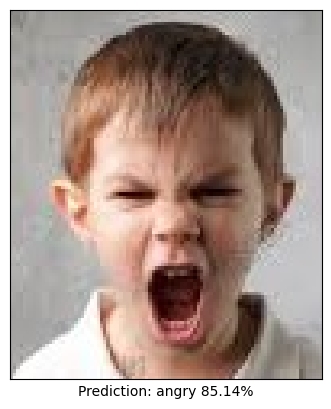

1/1 [==============================] - 0s 23ms/step


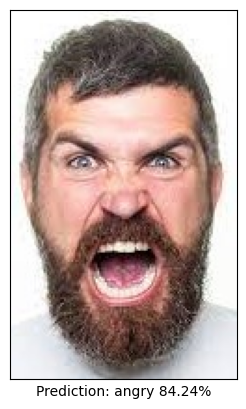

1/1 [==============================] - 0s 17ms/step


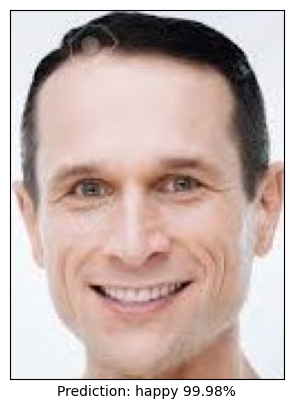

1/1 [==============================] - 0s 18ms/step


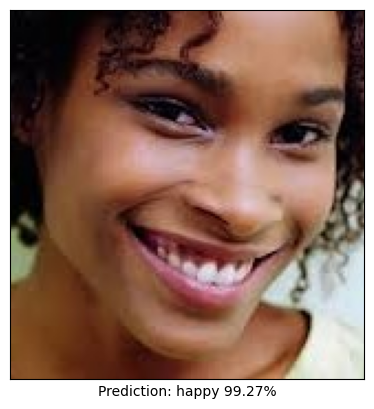

1/1 [==============================] - 0s 18ms/step


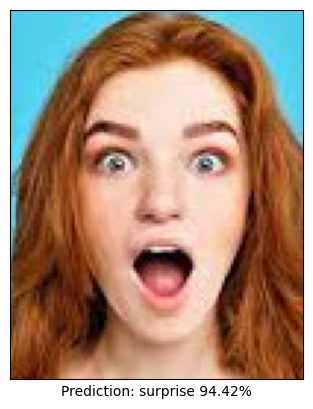

In [40]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = load_img(path)
  plt.imshow(img)
  img = load_img(path, target_size=(48, 48), color_mode='grayscale')

  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images)
  # print(classes)
  # print(fn, ":", class_names[np.argmax(classes)])
  # print(f'{fn} is {class_names[np.argmax(classes)]} {round(np.max(classes)*100,2)}%')

  plt.xlabel(f"Prediction: {class_names[np.argmax(classes)]} {round(np.max(classes)*100,2)}%") # writing label for each expression

  #turning x ans y tick marks off
  plt.xticks([])
  plt.yticks([])

  plt.show()

